In [1]:
from __future__ import print_function, division #compatibility py2 - py3
import random, math, numpy
import matplotlib.pyplot as plt

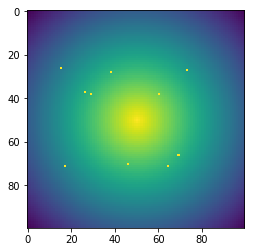

In [15]:
V = 2e-6
DT = 0.2
L = 100e-6
P1 = 0.9
P2 = 0.5
N = 10

def get_density(x,y): #version A
    return 1./(1.+math.hypot(x-L/2.,y-L/2.))

##def get_density(x,y): #version B
##    return float(math.hypot(x-L/2.,y-L/2.) < 15e-6)


def draw(b_list, n, t):
    m = numpy.zeros((n,n))
    for x in range(n):
        for y in range(n):
            m[x,y] = get_density(x*L/n,y*L/n)
    for bacteria in b_list:
        x,y = int(bacteria.x*n/L), int(bacteria.y*n/L)
        m[x,y] = 1.
    plt.imshow(m) #add interpolation='None' for non-smoothed image
    plt.savefig("bacteria"+str(t)+".png")
##    plt.show() #directly show the image

class Bacteria(object):

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.vx = None
        self.vy = None
        self.randomize_velocity()
        self.old_density = get_density(self.x, self.y)

    def randomize_velocity(self):
        alpha = random.random()*math.pi*2
        self.vx = math.cos(alpha) * V
        self.vy = math.sin(alpha) * V
        assert (math.hypot(self.vx, self.vy) - V) < 0.0000001

    def update(self):
        current_density = get_density(self.x, self.y)
        go_forward = False
        if current_density > self.old_density:
            ######  Question 1 #########
            if random.random() < P1:
                go_forward = True
        else:
            ######  Question 2 #########
            if random.random() < P2:
                go_forward = True
        if not go_forward:
            ######  Question 3 #########
            self.randomize_velocity()
        self.x += self.vx * DT
        self.y += self.vy * DT
        #domain periodicity:
        self.x %= L
        self.y %= L
        self.old_density = current_density

b_list = [Bacteria(random.random()*L, random.random()*L) for i in range(N)]

for t in range(200):
    if t%40 == 0:
        draw(b_list, 100, t)
    for bacteria in b_list:
        bacteria.update()